<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_T3_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Correlação e covariância

Você é analista de dados de uma empresa de educação. Foram coletadas informações sobre os seguintes atributos de alunos de um curso online:

- horas_estudo: número de horas que o aluno estudou na semana;
- nota_final: nota final no curso (0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis. Você deve usar
os dados simulados gerados pelo bloco de código fornecido abaixo.



In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30) # variavel livre
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30) # variavel dependente

df = pd.DataFrame({
  'Horas de Estudo': horas_estudo,
  'Nota Final': nota_final
})

###1.1 Cálculo Manual

Use as funções np.mean(), np.std() e np.cov() para comparar seus resultados.

1. Calcule a **média** de cada variável

In [ ]:
n = len(horas_estudo)

media_horas_estudo = sum(horas_estudo) / n
media_nota_final = sum(nota_final) / n

print(media_horas_estudo, media_nota_final)
print(horas_estudo.mean(), nota_final.mean())

9.623706208297927 87.88901248174199
9.623706208297927 87.88901248174199


2. Calcule a **covariância amostral**:

In [ ]:
# vetorialmente
cov = sum((horas_estudo - media_horas_estudo) * (nota_final - media_nota_final)) / (n-1)

print(cov)
print(np.cov(horas_estudo, nota_final, ddof=1)[0][1])

13.788410270749694
13.788410270749694


3. Calcule a **correlação de Pearson**

In [ ]:
desvio_horas_estudo = np.sqrt(sum((horas_estudo - media_horas_estudo)**2) / (n-1)) # amostral
desvio_nota_final = np.sqrt(sum((nota_final - media_nota_final)**2) / (n-1))

print(desvio_horas_estudo, desvio_nota_final)
print(horas_estudo.std(ddof=1), nota_final.std(ddof=1))

1.8000128548048226 8.952112839804329
1.8000128548048226 8.952112839804329


In [ ]:
corr = cov / (desvio_horas_estudo * desvio_nota_final)

print(corr)
print(np.corrcoef(horas_estudo, nota_final)[0][1])

0.8556832738480706
0.8556832738480707


### 1.2 Visualização

1. Crie um gráfico de dispersão entre horas_estudo e nota_final
2. Adicione uma linha de tendência linear;
3. Interprete o resultado: a relação é positiva, negativa ou nula

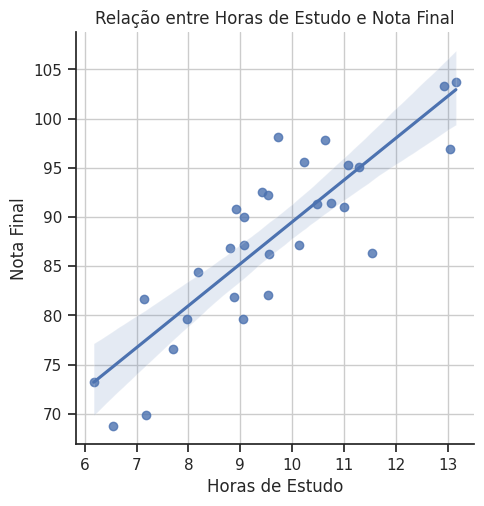

In [ ]:
import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

A relação é positiva!

### 1.3 Interpretação
- O valor da correlação está mais próximo de 0, +1 ou –1? O que isso indica?
- A covariância obtida é positiva ou negativa? O que isso significa no contexto?
- Se a unidade da nota fosse alterada (ex: de 0–100 para 0–10), o valor da
correlação mudaria? E a covariância?

O valor da correlação está mais próxima de +1. Isso indica que o aumento em uma variável geralmente acontece junto ao aumento de outra variável.

A covariância é positiva. Os alunos que estudam por mais tempo, tendem a ter uma nota melhor, e vice-versa.

A covariância mudaria. Mas não a correlação, a qual é apenas uma espécie de normalização da covariância.

### 1.4 Outras simulações
- Gere um novo conjunto de dados em que a correlação entre horas_estudo
e nota_final seja próxima de zero;
- Gere um conjunto com correlação negativa entre as variáveis.

-0.09358667141750737


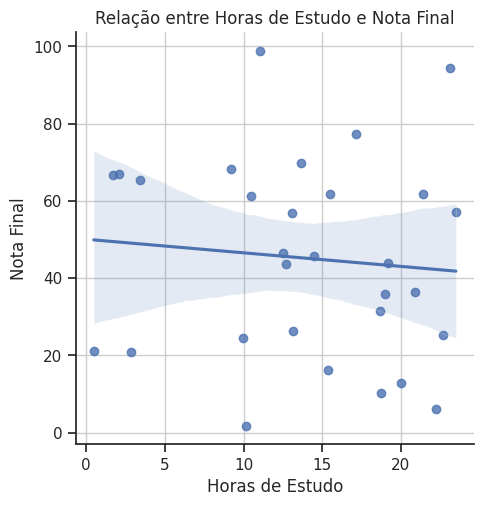

In [ ]:
np.random.seed(0)

n = 30
horas_estudo = np.random.uniform(0, 24, n)
nota_final = np.random.uniform(0, 100, n)

corr = np.corrcoef(horas_estudo, nota_final)[0][1]
print(corr)

df_zero = pd.DataFrame({'Horas de Estudo': horas_estudo, 'Nota Final': nota_final})

import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df_zero)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

-0.8240981003903521


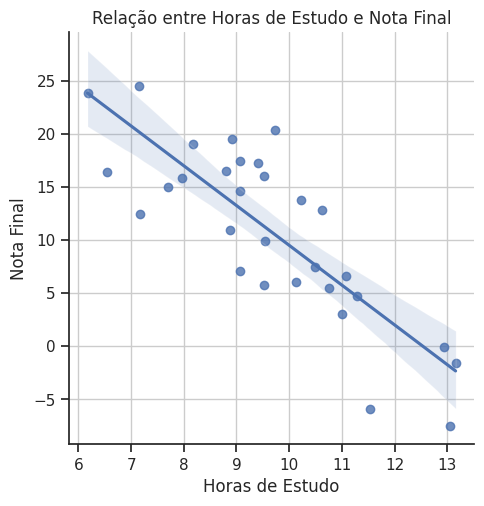

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30) # variavel livre
nota_final = 50 - 4 * horas_estudo + np.random.normal(0, 5, 30) # variavel dependente

df_neg = pd.DataFrame({
  'Horas de Estudo': horas_estudo,
  'Nota Final': nota_final
})

corr = np.corrcoef(horas_estudo, nota_final)[0][1]
print(corr)

import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df_neg)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

#2) Regressão Linear Múltipla

Considere o conjunto de dados Auto. O arquivo Auto.csv contém os dados para
essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [ ]:
df_tratado = df.replace("?", np.nan)
df_tratado.dropna(inplace=True)

In [ ]:
df_tratado['horsepower'] = pd.to_numeric(df_tratado['horsepower'])

(i) Produza uma matriz de gráfico de dispersão que inclua todas as variáveis
no conjunto de dados.

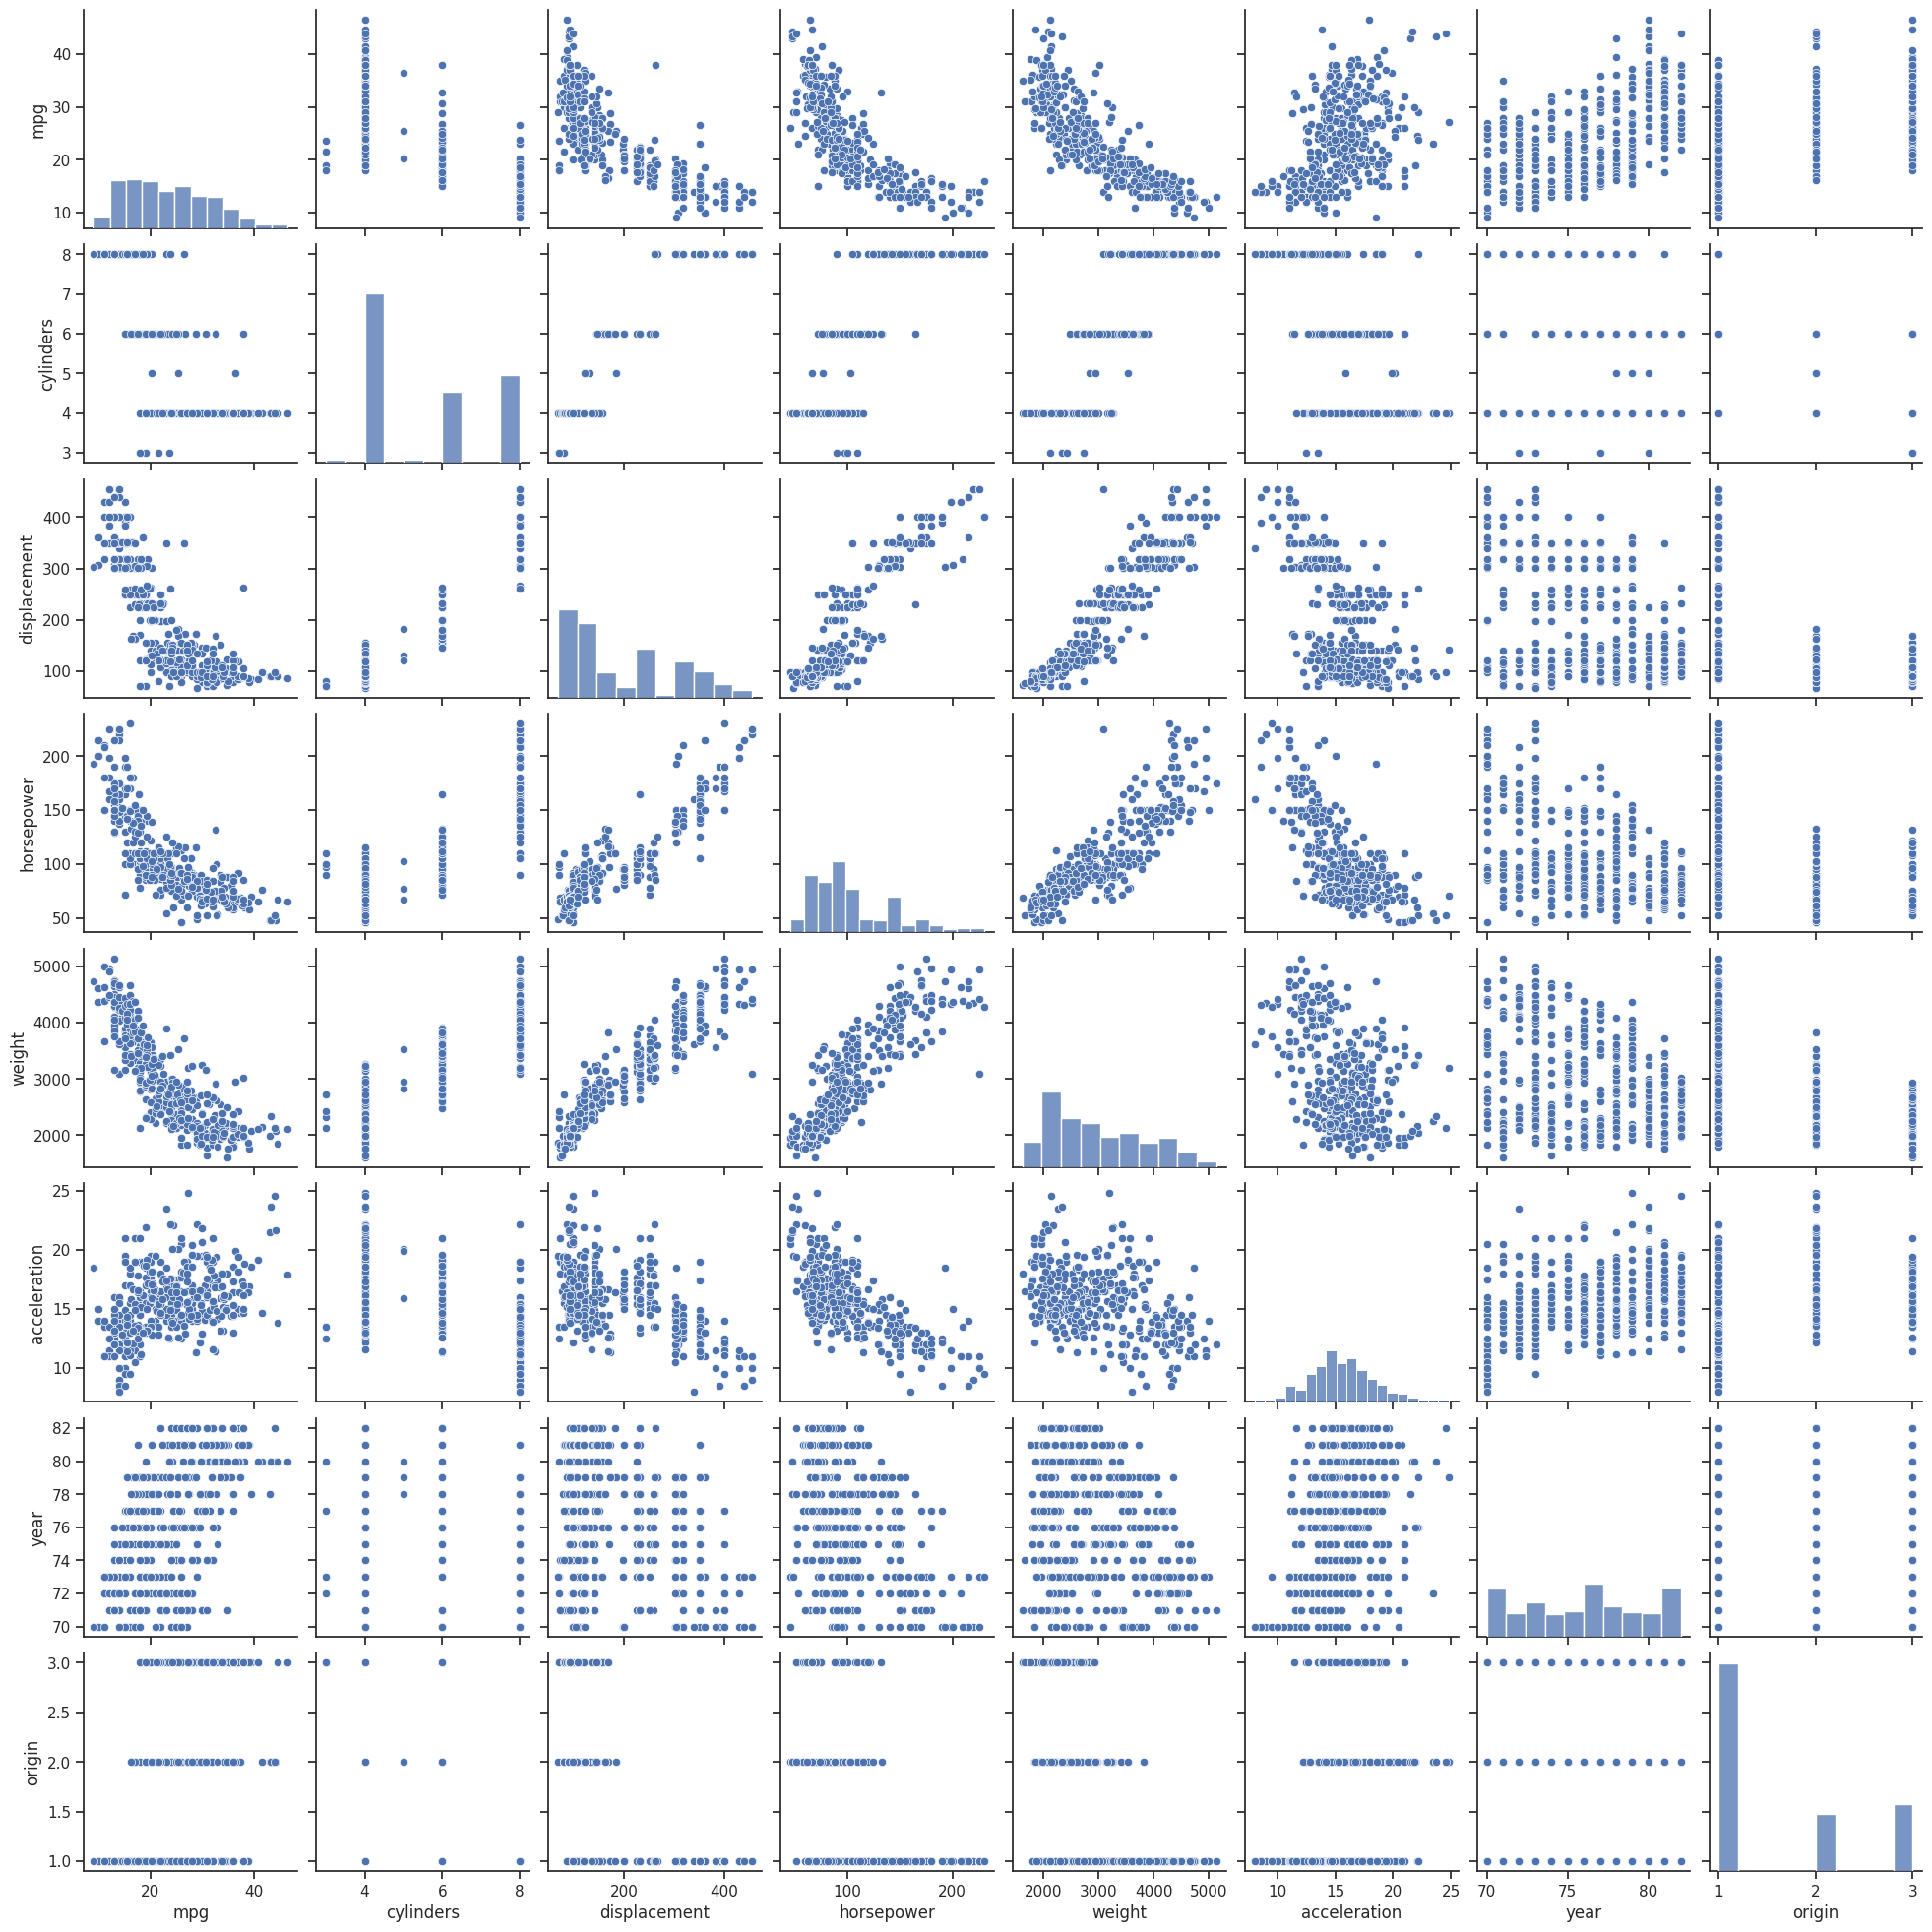

In [ ]:
import seaborn as sns
sns.pairplot(df_tratado)

É possível observar as relações (linear ou não linear) por exemplo, da variável mpg :
- mpg e cylinders (negativa)
- mpg e displacement (negativa)
- mpg e weight (negativa)
- mpg e acceleration (positiva, baixa)
- mpg e year (positiva, baixa)
- mpg e origin (positiva, baixa)

(ii) Calcule a matriz de correlações entre as variáveis usando a função corr()
do pandas.DataFrame. Você precisará excluir a variável name, que é qualitativa.

A variável horsepower parece estar no tipo object. Elementos faltantes foram codificados com "?".

In [ ]:
df_num = df_tratado.drop(columns=["name"])
corr = df_num.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


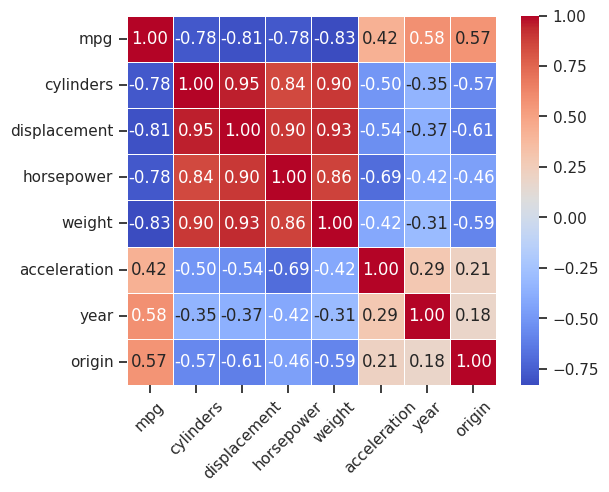

In [ ]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

#3) DiD: Salário mínimo x taxa de empregos

#4) DiD: validação

#5) Consumo de álcool x taxa de mortalidade